# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [266]:
## Understanding the Data

# The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
# The classification goal is to predict if the client will subscribe a term deposit (variable y).

# The data were collected from 2008 to 2013, in total of 52944 phone contacts which includes the effects of 
# the financial crisis period. The dataset contains a large set of 150 features which are related with 
# bank client, product and social-economic attributes. The the result is a binary unsuccessful or successful 
# contact of the telemarketing phone calls to sell the long-term deposits.

# The dataset is unbalanced, as only 6557 (12.38%) records are related with successes.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [267]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [301]:
## Read in the Data
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [269]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [270]:
## Understanding the Features

# The features in that are categorical values in object type should be encoded to numerical values.
# These include 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 
# 'day_of_week', 'poutcome', as well as the final outcome of 'y'

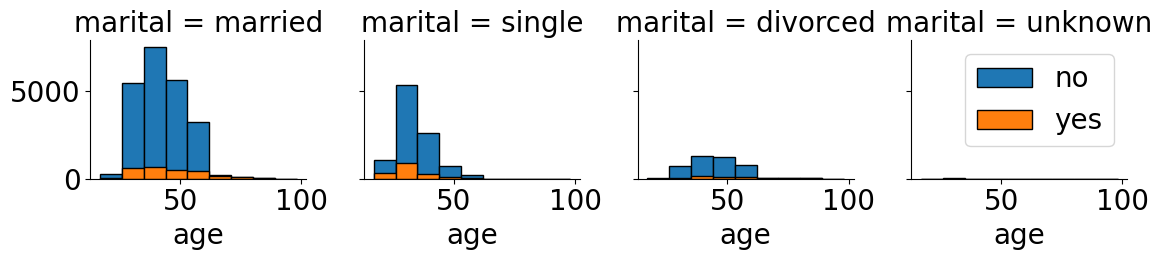

In [271]:
# The bank information features (columns 1 - 7) are used in the classification, whhile other
# features including 'age' were dropped. What would be the impact of 'age' feature?
# Before dropping the 'age' feature, I will look into the influence 'age' vs 'marital' on call success
# The histogram of 'age' stratified by marital and y shows that the impact of 'age' is in relatively 
# simliliar to different marital status.
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="marital", hue="y", palette="tab10", col_wrap=4)

g.map(plt.hist, 'age', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()
#plt.savefig("images/age_vs_marital.png")
g.savefig("images/Age_vs_Marital.png")

In [272]:
# Does any feature contain missing values? The df.isnull().sum() shows that no feature is missing values although some categorical features 
# may lack some of the categories.
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [273]:
## Understanding the Task - Business Objective 

# The Business Objective is to apply data mining technique via machine learning models to predict 
# the success of telemarketing calls for selling bank long-term deposits.

# By analyzing the features related with bank client, product and social-economic attributes by
# using different models, we can optimize targeting for telemarketing in order to increase bank 
# profits and reduce costs.

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [275]:
## Engineering Features

# For Features engineering, the first step is to keep only the bank information features (columns 1 - 7) for model fitting
df_bank = df[["job", "marital", "education", "default", "housing", "loan", "contact", "y"]]
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        41188 non-null  object
 1   marital    41188 non-null  object
 2   education  41188 non-null  object
 3   default    41188 non-null  object
 4   housing    41188 non-null  object
 5   loan       41188 non-null  object
 6   contact    41188 non-null  object
 7   y          41188 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


In [277]:
# The second step is to encode the column to transform from categorical values to numerical values
le = LabelEncoder()
df_encode = df_bank.apply(le.fit_transform)

# Generate X by dropping the 'y' column and set it for y
X = df_encode.drop('y', axis = 1)
y = df_encode['y']
X.head()

,job,marital,education,default,housing,loan,contact
0,3,1,0,0,0,0,1
1,7,1,3,1,0,0,1
2,7,1,3,0,2,0,1
3,0,1,1,0,0,0,1
4,7,1,3,0,0,2,1


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [278]:
## Train/Test Split

# I chose to split the data into train and test set with test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [279]:
X_train.head()

,job,marital,education,default,housing,loan,contact
39075,0,1,6,0,0,0,0
34855,9,2,6,0,0,0,1
7107,1,1,1,1,2,0,1
31614,7,1,6,0,0,0,0
34878,0,2,3,0,0,0,0


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [280]:
## A Baseline Model

# The baseline model can choose the DummyClassifier, which will act as a comparison to the actual model
baseline_model = DummyClassifier().fit(X_train, y_train)

baseline_score = baseline_model.score(X_test, y_test)

print('Baseline Score:', baseline_score)

Baseline Score: 0.8875940762320952


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [281]:
## A Simple Model

# Now I use Logistic Regression to build a basic model on the data
lgr = LogisticRegression().fit(X_train, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [282]:
## Get the score the Model
lgr_score = lgr.score(X_test, y_test)

print('Logistic Regression Score:', lgr_score)

Logistic Regression Score: 0.8875940762320952


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [283]:
## Model Comparisons
# Next, I compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models

# Logistic Regression Model
lgr = LogisticRegression()

start = time.time()
lgr_model = lgr.fit(X, y)
stop = time.time()

lgr_train_time = stop - start
lgr_train_accuracy = lgr_model.score(X_train, y_train)
lgr_test_accuracy = lgr_model.score(X_test, y_test)

print('Logistic Regression Model:')
print('  Train Time:', lgr_train_time)
print('  Train Accuracy:', lgr_train_accuracy)
print('  Test Accuracy:', lgr_test_accuracy)

Logistic Regression Model:
  Train Time: 0.18196773529052734
  Train Accuracy: 0.8872394297804447
  Test Accuracy: 0.8875940762320952


In [284]:
# KNN Model
knn = KNeighborsClassifier()

start = time.time()
knn_model = knn.fit(X, y)
stop = time.time()

knn_train_time = stop - start
knn_train_accuracy = knn_model.score(X_train, y_train)
knn_test_accuracy = knn_model.score(X_test, y_test)

print('KNN Model:')
print('  Train Time:', knn_train_time)
print('  Train Accuracy:', knn_train_accuracy)
print('  Test Accuracy:', knn_test_accuracy)

KNN Model:
  Train Time: 0.3305840492248535
  Train Accuracy: 0.8877250182095661
  Test Accuracy: 0.8885651857246905


In [285]:
# Decision Tree Model
dtree = DecisionTreeClassifier()

start = time.time()
dtree_model = dtree.fit(X, y)
stop = time.time()

dtree_train_time = stop - start
dtree_train_accuracy = dtree_model.score(X_train, y_train)
dtree_test_accuracy = dtree_model.score(X_test, y_test)

print('Decision Tree Model:')
print('  Train Time:', dtree_train_time)
print('  Train Accuracy:', dtree_train_accuracy)
print('  Test Accuracy:', dtree_test_accuracy)

Decision Tree Model:
  Train Time: 0.09524989128112793
  Train Accuracy: 0.8900142208039957
  Test Accuracy: 0.8922877721129724


In [286]:
# SVM Model
svc = SVC()

start = time.time()
svc_model = svc.fit(X, y)
stop = time.time()

svc_train_time = stop - start
svc_train_accuracy = svc_model.score(X_train, y_train)
svc_test_accuracy = svc_model.score(X_test, y_test)

print('SVM Model:')
print('  Train Time:', svc_train_time)
print('  Train Accuracy:', svc_train_accuracy)
print('  Test Accuracy:', svc_test_accuracy)

SVM Model:
  Train Time: 57.256014347076416
  Train Accuracy: 0.8872394297804447
  Test Accuracy: 0.8875940762320952


In [287]:
# Performance Metric
res_dict = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
           'Train Time': [lgr_train_time, knn_train_time, dtree_train_time, svc_train_time],
           'Train Accuracy': [lgr_train_accuracy, knn_train_accuracy, dtree_train_accuracy, svc_train_accuracy],
           'Test Accuracy': [lgr_test_accuracy, knn_test_accuracy, dtree_test_accuracy, svc_test_accuracy]}


results_df = pd.DataFrame(res_dict)
print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.181968        0.887239       0.887594
1                  KNN    0.330584        0.887725       0.888565
2        Decision Tree    0.095250        0.890014       0.892288
3                  SVM   57.256014        0.887239       0.887594


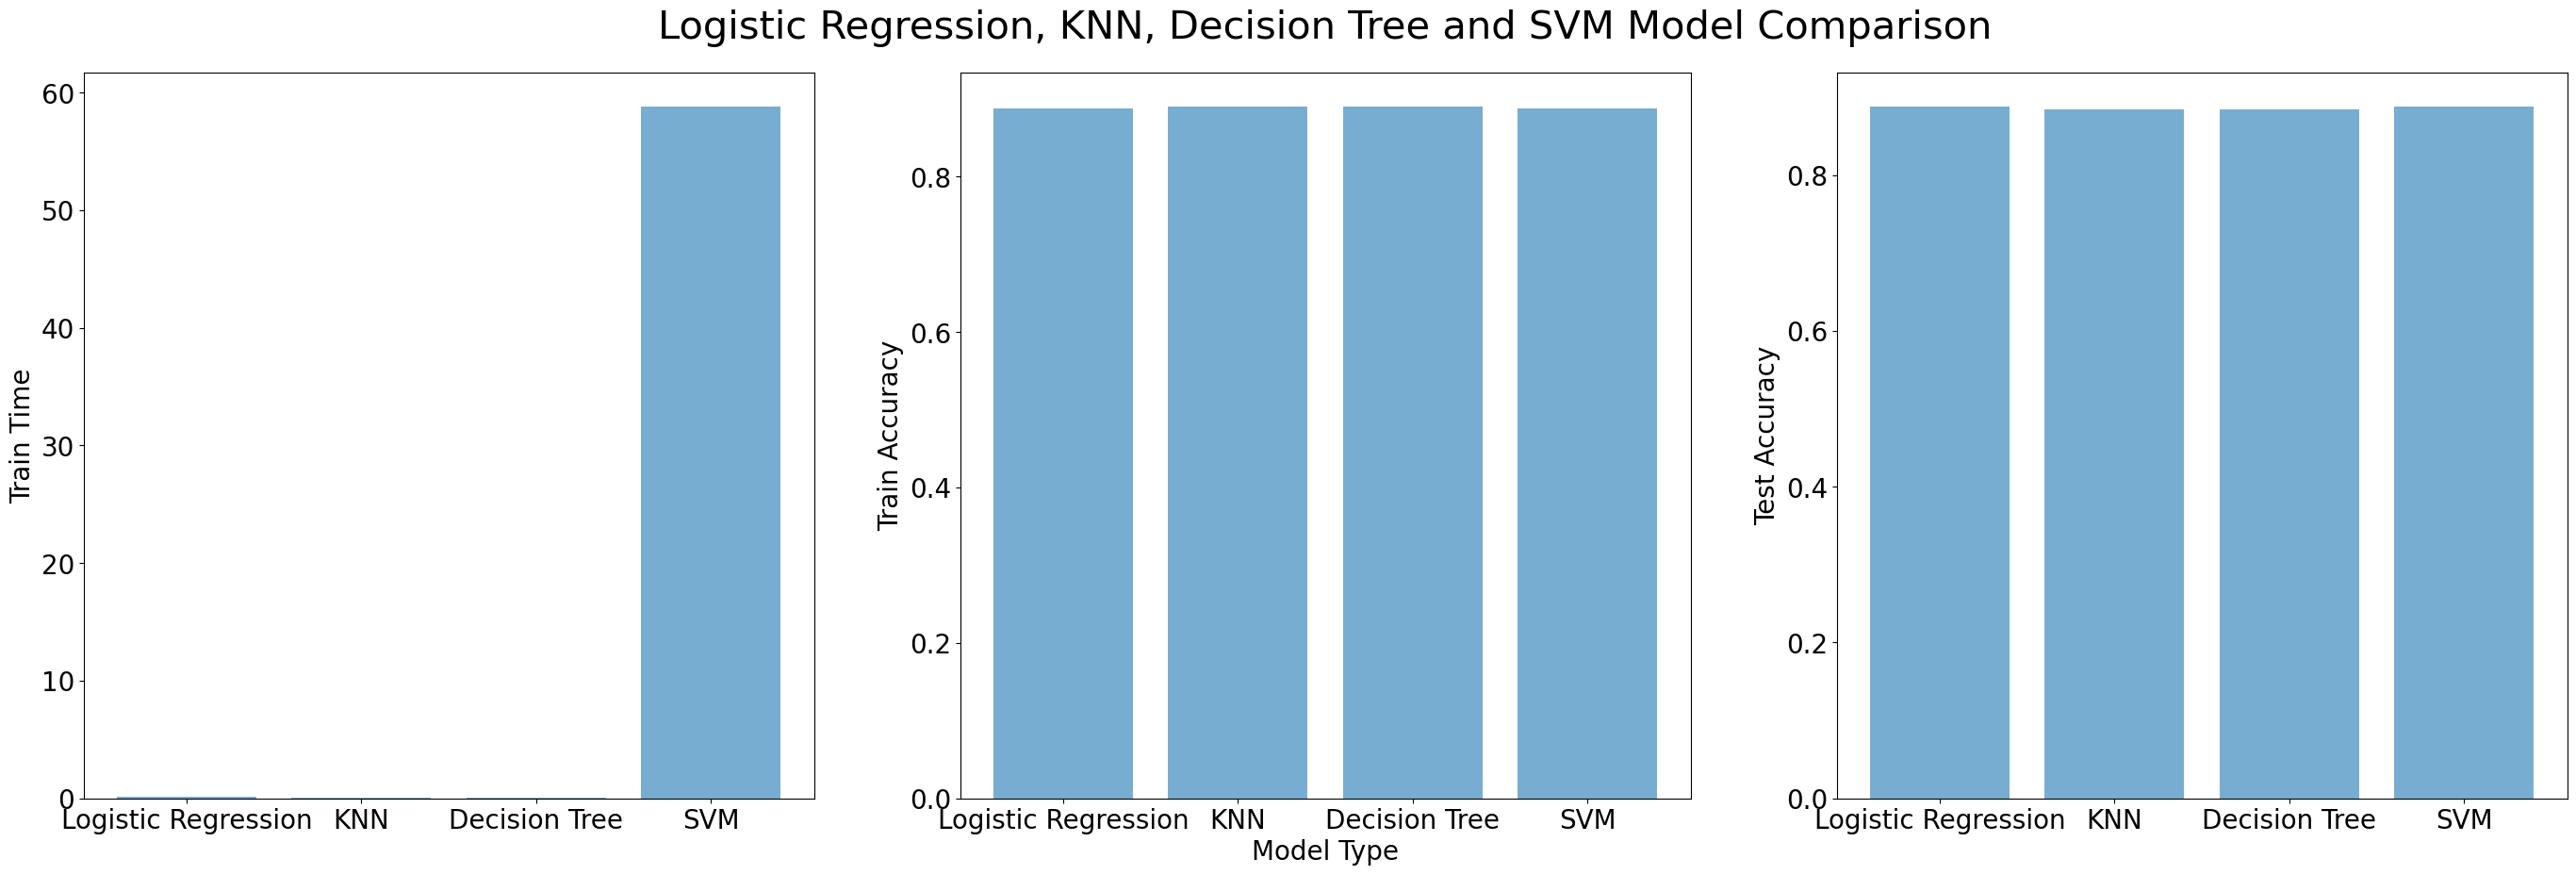

In [288]:
# Compare Logistic Regression, KNN, Decision Tree and SVM models and create visulization plot
plt.rcParams.update({'font.size': 20})

plt.figure(figsize = (34,10))
plt.subplot(1, 3, 1)
plt.bar(adj_results_df['Model'], adj_results_df['Train Time'], align='center', alpha = 0.6)
plt.ylabel('Train Time', fontdict={'fontsize':20})

plt.subplot(1, 3, 2) 
plt.bar(adj_results_df['Model'], adj_results_df['Train Accuracy'], align='center', alpha = 0.6)
plt.xlabel('Model Type', fontdict={'fontsize':20})
plt.ylabel('Train Accuracy', fontdict={'fontsize':20})

plt.title('Logistic Regression, KNN, Decision Tree and SVM Model Comparison', fontdict={'fontsize':30}, pad=26)

plt.subplot(1, 3, 3) 
plt.bar(adj_results_df['Model'], adj_results_df['Test Accuracy'], align='center', alpha = 0.6)
plt.ylabel('Test Accuracy', fontdict={'fontsize':20})

plt.savefig("images/Model_Comparison.png")

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [289]:
## Improving the Model

# Feature engineering and exploration is important to increase the accuracy of model classification.
# I believe keeping the gender feature would be beneficial for model improvement. This is because 
# in the situation of direct marketing calls, gender influence (male/female) which may related to 
# three categories, related with the gender of the banking agent, client and client-agent difference, 
# indeed can impact the outcome of successful and unsuccessful rate. Therefore gender feature can be 
# included to increase the accuracy of the classification by machine learning models.

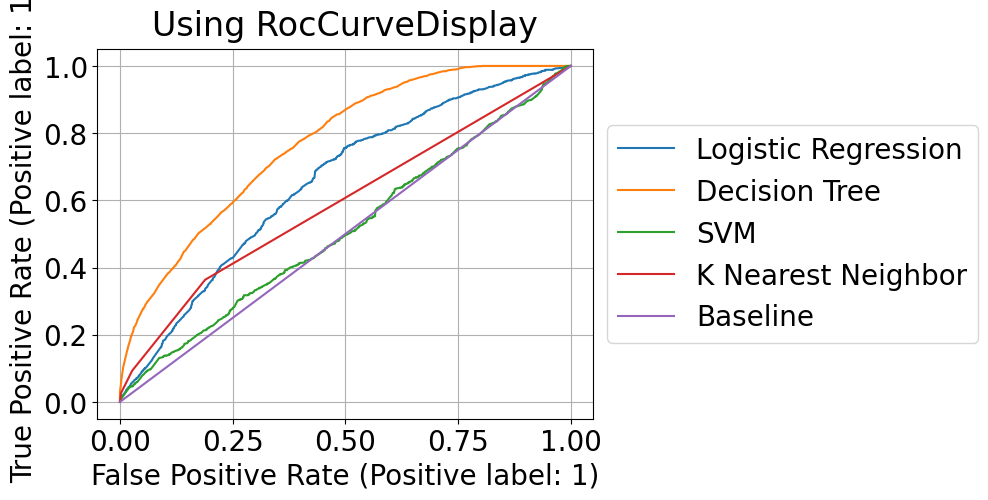

In [290]:
# Hyperparameter tuning and grid search
# I use RocCurveDisplay to analyze the performance of a classification model at all classification thresholds.
fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(lgr_model, X_test, y_test, pos_label = 1, ax = ax, label = 'Logistic Regression')
RocCurveDisplay.from_estimator(dtree_model, X_test, y_test, pos_label = 1, ax = ax, label = 'Decision Tree')
RocCurveDisplay.from_estimator(svc_model, X_test, y_test, pos_label = 1, ax = ax, label = 'SVM')
RocCurveDisplay.from_estimator(knn_model, X_test, y_test, ax = ax, label = 'K Nearest Neighbor')
RocCurveDisplay.from_estimator(baseline_model, X_test, y_test, ax = ax, label = 'Baseline')

plt.grid()
plt.plot()
plt.title('Using RocCurveDisplay', pad=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

plt.savefig("images/RocCurveDisplay.png")

In [291]:
# The result from RocCurveDisplay shows that the Decision Tree model provide the best performance of classification
depths = list(range(1,15))
train_accuracy = []
test_accuracy = []
tree_loop = []

for depth in depths:
    dtrees = DecisionTreeClassifier(max_depth = depth)

    dtrees.fit(X_train, y_train)
    
    tree_loop.append(dtrees)
    
    train_accuracy.append(dtrees.score(X_train, y_train))
    test_accuracy.append(dtrees.score(X_test, y_test))


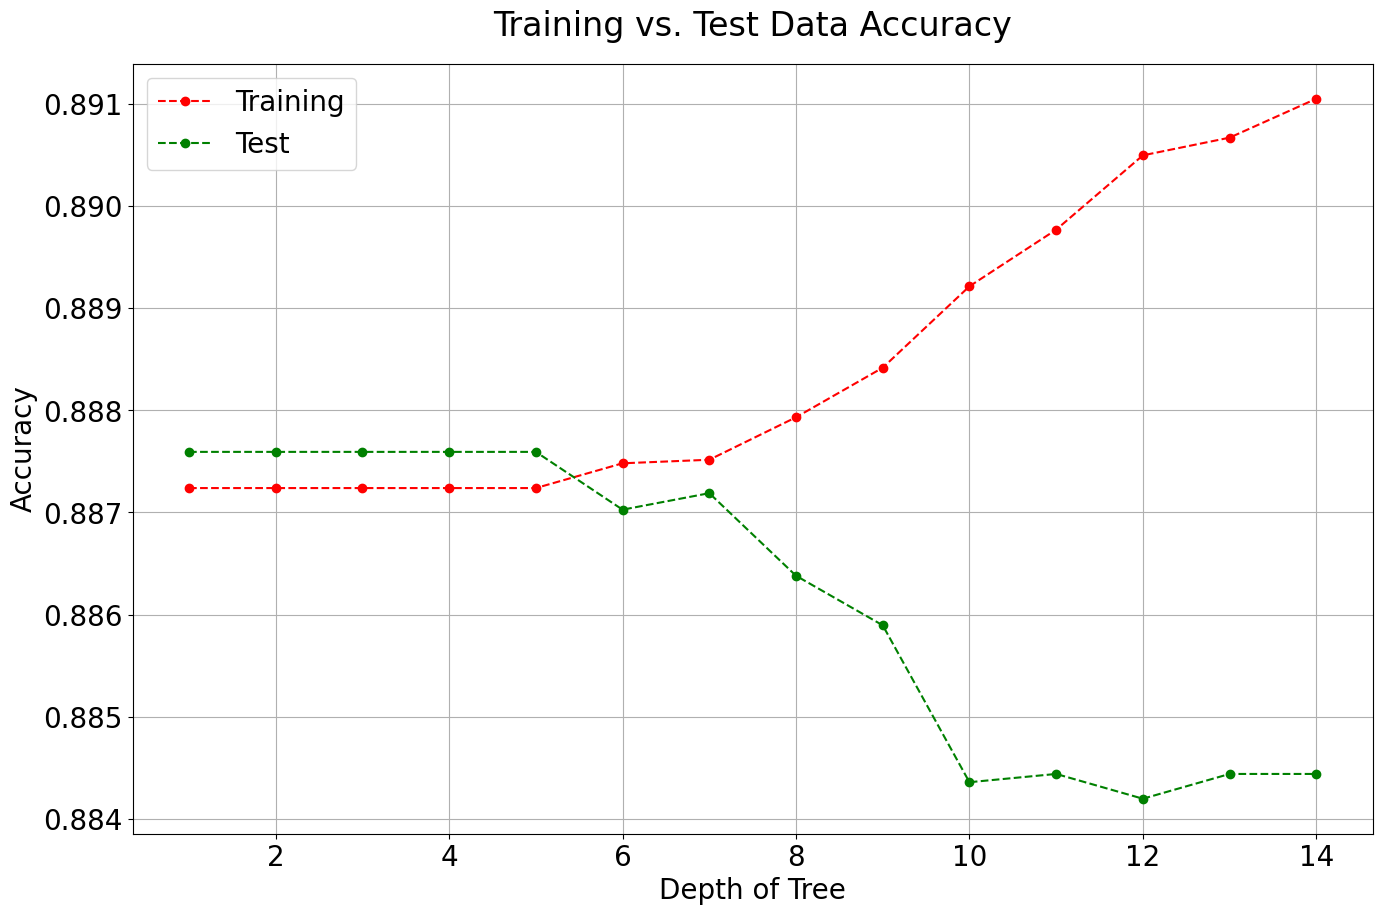

In [292]:
# Create the visualization of the training and test data accuracy
plt.figure(figsize = (16,10))
plt.plot(depths, train_accuracy, '--o', color = 'red', label = 'Training')
plt.plot(depths, test_accuracy, '--o', color = 'green', label = 'Test')
plt.title('Training vs. Test Data Accuracy', pad = 20)
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.grid();
plt.savefig("images/Training_vs_Test_Accuracy.png")

In [293]:
# From the Decision Tree training and test data accuracy curve above, the best max_depth is chosen 
dtree_best = DecisionTreeClassifier(max_depth = 11)
dtree_model = dtree_best.fit(X_train, y_train)

dtree_predict = dtree_best.predict(X_test)
print(dtree_predict[0:5])

[0 0 0 0 0]


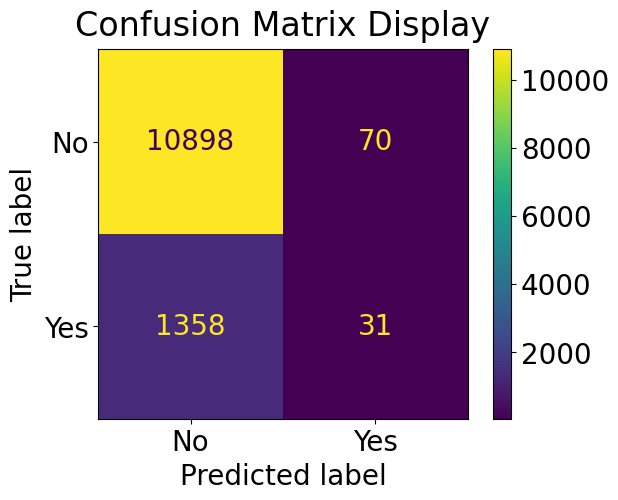

<Figure size 640x480 with 0 Axes>

In [294]:
# Next, calculate the confusion matrix and create the visualization plot
dtree_confusion_mat = confusion_matrix(y_test, dtree_predict, labels = dtree_best.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = dtree_confusion_mat, display_labels = ["No","Yes"])

disp.plot()
plt.title('Confusion Matrix Display', pad=10)
plt.show()
plt.savefig("images/Confusion_Matrix.png")

In [295]:
# Calculate the values for best Decision Tree model
start = time.time()
dtree_model = dtree_best.fit(X_train, y_train)
stop = time.time()

dtree_train_time = stop - start
dtree_train_accuracy = dtree_model.score(X_train, y_train)
dtree_test_accuracy = dtree_model.score(X_test, y_test)

print('Best Decision Tree Model:')
print('  Train Time:', dtree_train_time)
print('  Train Accuracy:', dtree_train_accuracy)
print('  Test Accuracy:', dtree_test_accuracy)

Best Decision Tree Model:
  Train Time: 0.04707217216491699
  Train Accuracy: 0.889771426589435
  Test Accuracy: 0.8844379703811605


In [296]:
# Adjust the performance metric using Decision Tree model max_depth = 11
adj_res_dict = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
           'Train Time': [lgr_train_time, knn_train_time, dtree_train_time, svc_train_time],
           'Train Accuracy': [lgr_train_accuracy, knn_train_accuracy, dtree_train_accuracy, svc_train_accuracy],
           'Test Accuracy': [lgr_test_accuracy, knn_test_accuracy, dtree_test_accuracy, svc_test_accuracy]}


adj_results_df = pd.DataFrame(adj_res_dict)
print(adj_results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.181968        0.887239       0.887594
1                  KNN    0.330584        0.887725       0.888565
2        Decision Tree    0.047072        0.889771       0.884438
3                  SVM   57.256014        0.887239       0.887594


In [297]:
## Conclusion

# The findings of this study can be summarized as below:
 
# (1) The result from Confusion Matrix show that using the best model created, the true unsuccessful 
# rate is quite high, meaning it is easier for the caller of telemarketing campaigns to tell which client 
# may decline to subscribe a term deposit, while the true successful rate is relative low, meaning it is harder 
# determine which client may accept to subscribe a term deposit. 
    
# (2) From RocCurveDisplay, the Decision Tree's ROC curve is closer to the upper left corner of the graph, 
# which means it provides higher the accuracy of the test data. It was further identified that max_depth = 11 
# can produce better accuracy, while may run into overfitting if max_depth is increased further.

# (3) The Logistic Regression, KNN, Decision Tree and SVM come up with relatively similiar train accuracy 
# and test accuracy for this dataset, while the SVM takes significantly more train time to complete as compared 
# to that of the other three models. 

In [298]:
## Next steps and recommendations

# For Next steps and recommendations, I can explore further in two areas:

# (1) Understand if we include more features in the model fitting, would it increase the accuracy of the 
# classification. In this study, we use bank information features (columns 1 - 7) only, we could include 
# other features such as 'age', product and social-economic attributes to figure out their impact on 
# the classification accuracy.

# (2) Understand why the SVM is slow as compared to Logistic Regression, KNN and Decision Tree models. When the 
# SVM model performs the training, it is not conducted incrementally. Instead, it requires the entire 
# dataset to be trained all at once. So if there are more data points, it's going to run long time to complete. 

# In order to speed up the non-linear kernel of SVM, it is possible to use cross-validation or grid search to find 
# the optimal values for a well-tuned model can converge faster with better results, and even use SGDClassifier 
# and kernel approximator like Nystroem for hyperparameter tuning. These steps can be considered for further investigation.


##### Questions